***

# <a>Background</a>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Problem Statement**

In this challenge, we need to identify which transaction is a fraud transaction.

## Load Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
train_df=pd.read_csv('creditcard.csv')

# <a>Data Exploration</a>

In [3]:
print("dimensions of train data:",train_df.shape)

dimensions of train data: (284807, 31)


Both the data sets have 200000+ observations with 31 columns respectively

In [4]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Missing value Analysis

In [7]:
#checking for missing values and data types in train data
value = []
for col in train_df.columns:
    dtype = str(train_df[col].dtype)
    value.append(dtype)
dt= pd.DataFrame(data=train_df.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


**So, there is no missing data in the train  data**

# <a>Exploratory data analysis</a>

Text(0.5, 1.0, 'Distribution in Target Variable ')

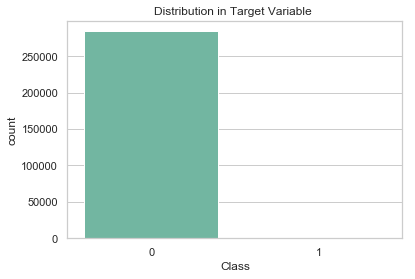

In [8]:
#checking the data distribution in target column
sns.set(style='whitegrid')
sns.countplot(train_df['Class'], palette='Set2')
plt.title("Distribution in Target Variable ")

In [9]:
print('There are {}% 1\'s in target variable'.format(100 * train_df['Class'].value_counts()[1]/train_df.shape[0]))
print('& {}% 0\'s in target variable'.format(100 * train_df['Class'].value_counts()[0]/train_df.shape[0]))

There are 0.1727485630620034% 1's in target variable
& 99.827251436938% 0's in target variable


It is clear this is a unbalanced data set. we have to resample it in the later stage.

In [10]:
#defining a function for visualizing data distribution in variables
def plot_distribution(df, columns):
    sns.set()
    fig, ax= plt.subplots(6,5,figsize=(20,24))
    i = 0
    for col in columns:
        i += 1
        plt.subplot(6,5,i)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=6, pad=-7)
    plt.show()
    

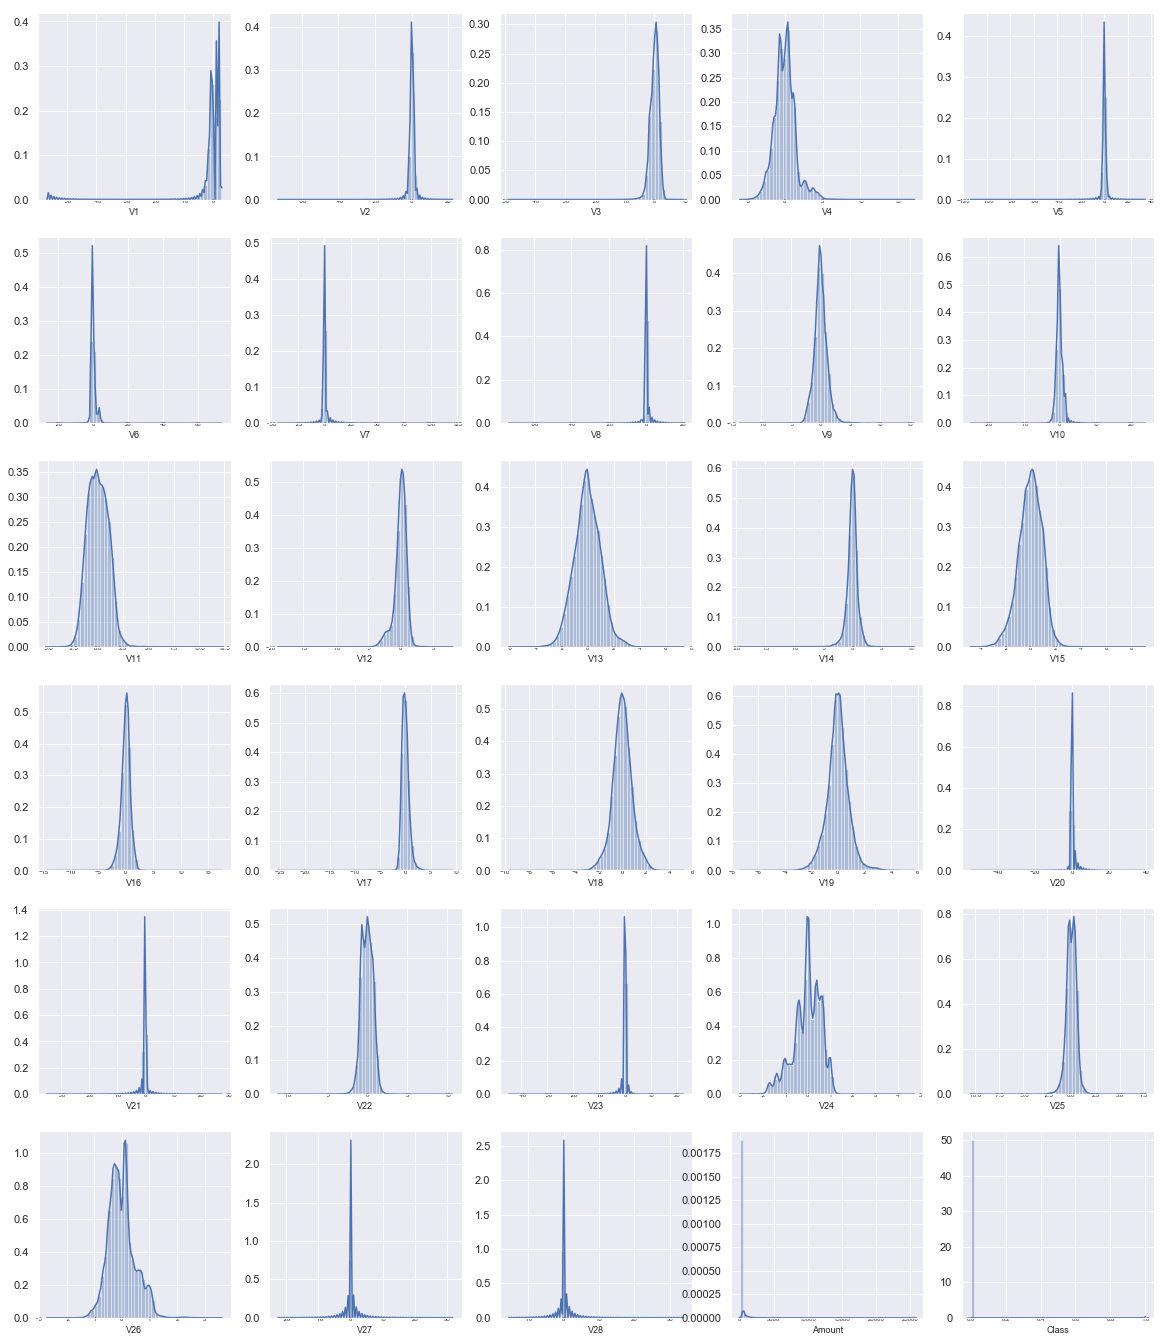

In [11]:
#setting columns and viewing data
columns =train_df.columns.values[1:] 
plot_distribution(train_df,columns)

From the same function we can view the distribution of test set as well. from the above plots we can see that the data is well distributed though there were some exceptions here and there.

## Outlier Analysis

In [12]:
def feature_boxplot(df, columns):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(6,5,figsize=(18,24))
    plt.title("Outliers")
    i=0
    for col in columns:
        i += 1
        plt.subplot(6,5,i)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=7, pad= -7)
    plt.show()

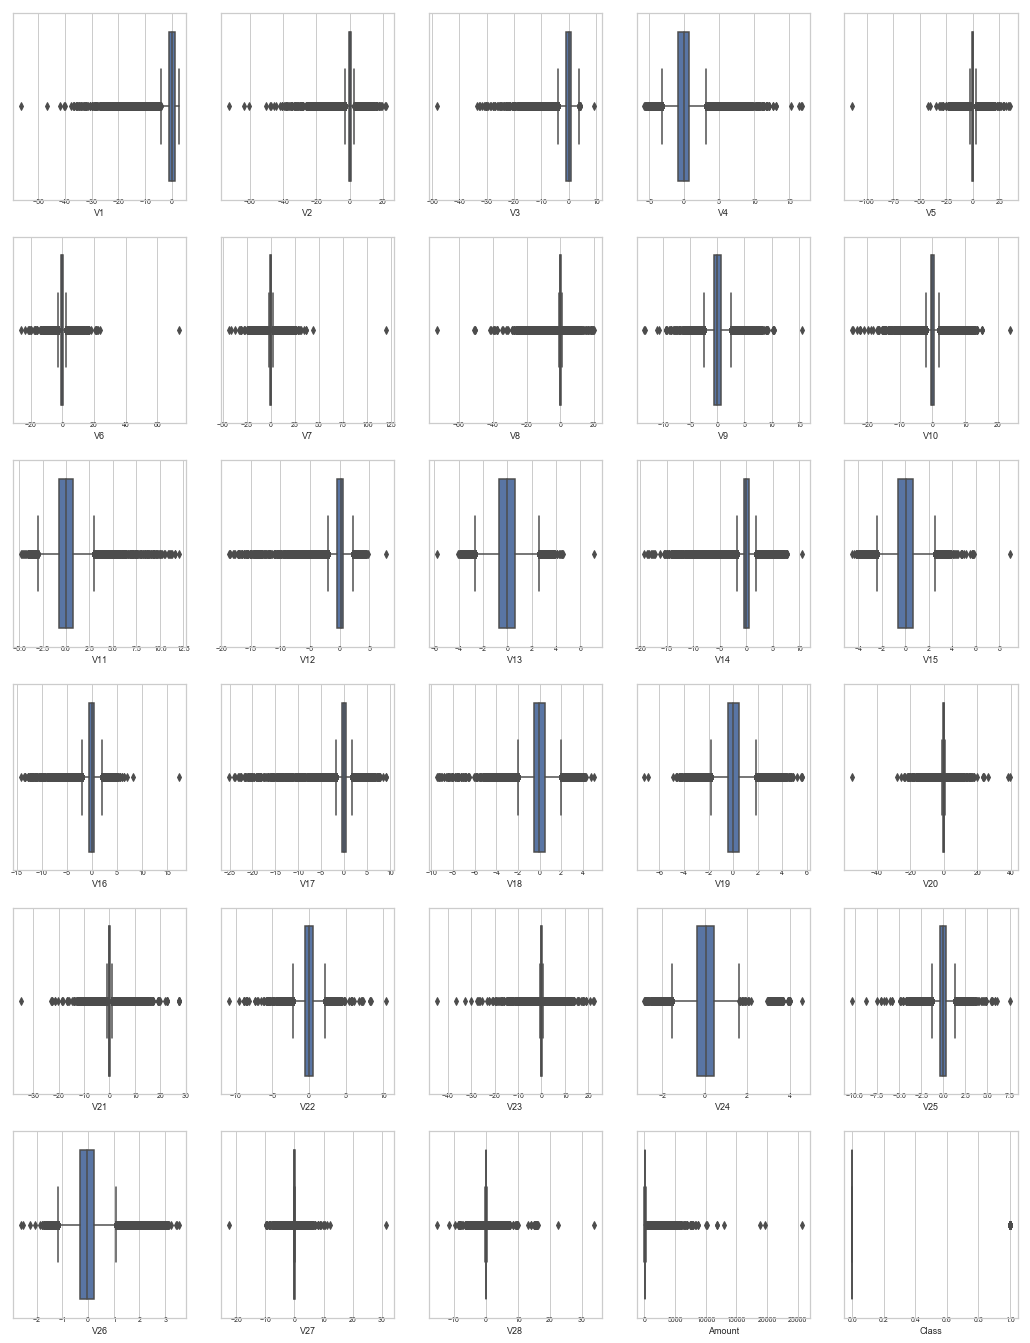

In [13]:
columns=train_df.columns.values[1:]
feature_boxplot(train_df,columns)

We the box plots we can see that almost all the variables have outliers so we have to get rid of them.

In [14]:
#creating columns list
cnames = train_df.drop(['Class','Time','Amount'],axis=1).columns
cnames

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [15]:
#copying df
df_train =train_df.copy()

* we are not going to remove any outliers as the data we have is already from PCA and all we have is features

#detecting and deleting outliers from the  train data
for i in cnames:
    q75, q25 =np.percentile(train_df.loc[:,i],[75,25])
    iqr  = q75-q25
    min  = q25 - (iqr*1.5)
    max  = q75 + (iqr*1.5)
    train_df = train_df.drop(train_df[train_df.loc[:,i]<min].index) 
    train_df = train_df.drop(train_df[train_df.loc[:,i]>max].index) 

#checking the number of observations dropped
print("Total number of observations dropped in train set:",df_train.shape[0]-train_df.shape[0])
train_df.shape

## Feature Selection

Now lets check the correlation between the features in train set

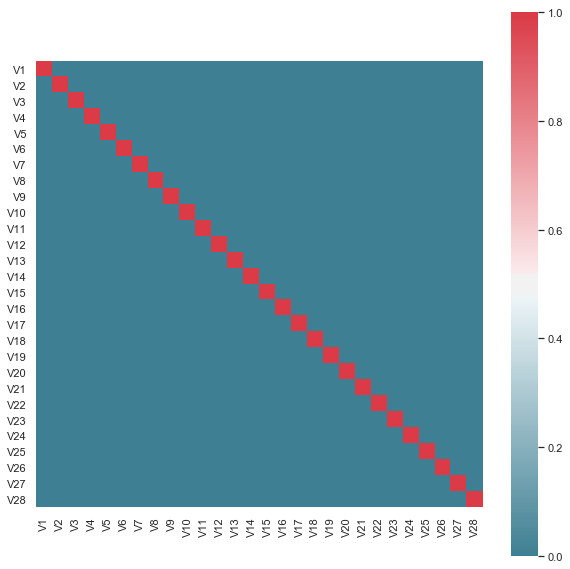

In [16]:
df_corr= train_df.loc[:,cnames]
f,ax= plt.subplots(figsize=(10,10))
corr= df_corr.corr()
sns.heatmap(corr,mask= np.zeros_like(corr,dtype= np.bool),cmap= sns.diverging_palette(220,10,as_cmap= True),square= True,ax=ax)

From the color of the graph we can see that there isn't much correlation between the variables. So, we have to keep all the 28 columns. 

In [17]:
#copying data
data_Train =train_df.copy()

## Feature Scaling

While observing the distributions there were slight variations here and there and even in description of the dataset standard deviation of the variables is high.
So, before going for modelling lets normalize the data.

In [18]:
#Normalization of train set
for i in cnames:
    train_df[i]=(train_df[i]-train_df[i].min())/(train_df[i].max()-train_df[i].min())

In [19]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,149.62,0
1,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,2.69,0
2,1.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,378.66,0
3,1.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,123.50,0
4,2.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,69.99,0


In [20]:
#copying the normalised data
train_N = train_df.copy()

In [21]:
train_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
#dropping ID_code variable from both train and test sets
train_df=train_df.drop(columns=['Time','Amount'],axis=1)


## Resampling

In [23]:
## Get the YES and the NO from the target 

YES = train_df[train_df['Class']==1]

NO  = train_df[train_df['Class']==0]

In [24]:
print(YES.shape,NO.shape)

(492, 29) (284315, 29)


In [25]:
#Separating the dependent and independent variables
y =train_df['Class']
X =train_df.drop(['Class'],axis=1)

In [26]:
from imblearn.over_sampling import SMOTE
import itertools

#Y = Y.astype('int')
X_balance,Y_balance = SMOTE().fit_sample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns) 

In [27]:
X_balance.shape,Y_balance.shape

((568630, 28), (568630,))

Text(0.5, 1.0, 'Distribution in Target Variable ')

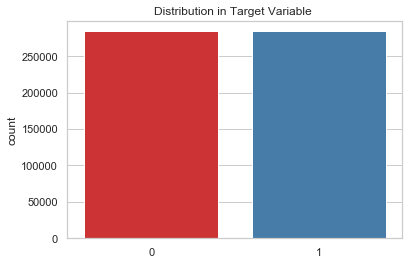

In [28]:
#checking the data distribution in target column
sns.set(style='whitegrid')
sns.countplot(Y_balance, palette='Set1')
plt.title("Distribution in Target Variable ")

Now we can see that we have a balanced data set after performing over sampling on target column.

# <a>Modelling</a>

In [29]:
#importing packages 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [30]:
#dividing data_set into train & test
X_train, X_test, Y_train, Y_test= train_test_split(X_balance, Y_balance, test_size=0.3, random_state=82)

In [31]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(398041, 28) (170589, 28) (398041,) (170589,)


### Logistic Regression

In [32]:
#fitting the model
logit = sm.Logit(Y_train,X_train).fit(method='bfgs')
logit.summary()

         Current function value: 0.155579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               398041
Model:                          Logit   Df Residuals:                   398013
Method:                           MLE   Df Model:                           27
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.7755
Time:                        22:47:14   Log-Likelihood:                -61927.
converged:                      False   LL-Null:                   -2.7590e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1             1.2692      0.288      4.406      0.000       0.705       1.834
V2             6.2804      0.486     12.927      0.000       5.328       7.233
V3            -4.5334      0.328    -13.804      0.000      -5.177      -3.890
V4            17.9143      0.137    130.288      0.000      17.645      18.184
V5             3.3801      0.780      4.334      0.000       1.852       4.909
V6            -0.2652      0.670     -0.396      0.692      -1.579       1.048
V7            -0.0144      1.000     -0.014      0.988      -1.974       1.945
V8             3.2822      0.591      5.557      0.000       2.125       4.440
V9            -2.2393      0.241     -9.310      0.000      -2.711      -1.768
V10           -6.2142      0.389    -15.994      0.000      -6.976      -5.453
V11           10.5469      0.129     81.627      0.000      10.294      10.800
V12          -10.7483      0.206    -52.185      0.000     -11.152     -10.345
V13           -4.6091      0.099    -46.590      0.000      -4.803      -4.415
V14          -17.5522      0.211    -83.378      0.000     -17.965     -17.140
V15            0.4706      0.110      4.284      0.000       0.255       0.686
V16           -2.7219      0.310     -8.782      0.000      -3.329      -2.114
V17           -1.5322      0.249     -6.147      0.000      -2.021      -1.044
V18            3.1869      0.155     20.585      0.000       2.883       3.490
V19           -2.5551      0.115    -22.166      0.000      -2.781      -2.329
V20            3.2338      0.799      4.046      0.000       1.667       4.800
V21            3.8613      0.547      7.059      0.000       2.789       4.933
V22            1.9306      0.256      7.555      0.000       1.430       2.432
V23            3.0903      0.703      4.399      0.000       1.713       4.467
V24           -0.4999      0.106     -4.715      0.000      -0.708      -0.292
V25            4.0403      0.277     14.578      0.000       3.497       4.584
V26           -4.7195      0.122    -38.643      0.000      -4.959      -4.480
V27            2.5302      0.968      2.614      0.009       0.633       4.427
V28            1.8598      1.019      1.826      0.068      -0.137       3.856
==============================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [33]:
#predicting the model
logit_predict = logit.predict(X_test)

In [34]:
y_predict=logit_predict.round()

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.9354
       0      1
0  83448   2101
1   8919  76121
[[0.97544098 0.02455902]
 [0.10488006 0.89511994]]


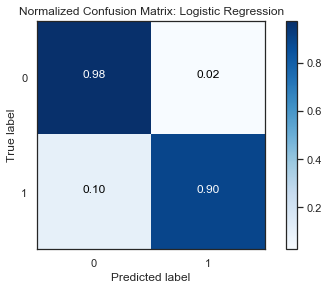

In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(Y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(Y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

###### Logistic Regression Metrics

In [39]:
#importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [40]:
print("Precision score : {} %".format(precision_score(Y_test,y_predict)*100))
print("Recall score : {} %".format(recall_score(Y_test,y_predict)*100))
print("AUC_score is {}%".format(roc_auc_score(Y_test,y_predict)*100))
print("Accuracy is {}%".format(accuracy_score(Y_test,y_predict)*100))

Precision score : 97.31405486947406 %
Recall score : 89.51199435559737 %
AUC_score is 93.52804594517175%
Accuracy is 93.54002895849088%


In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85549
           1       0.97      0.90      0.93     85040

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



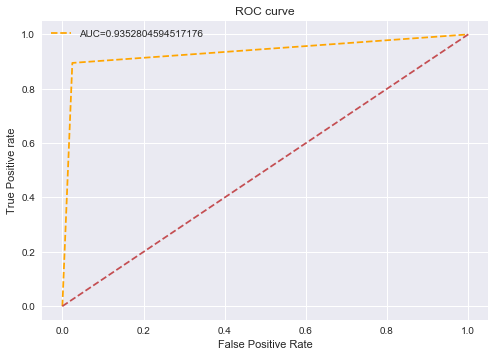

In [42]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn import metrics



# model = LogisticRegression(C=0.8, random_state=0,solver='lbfgs')
# model.fit(X_train, y_train)
# Y_predict = model.predict(X_test)

#define metrics
#y_pred_proba = log_regression.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_predict)

auc =  metrics.roc_auc_score(Y_test, y_predict)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_LR',dpi=300)
plt.show()

## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
NB_model = GaussianNB().fit(X_train,Y_train)

In [45]:
NB_pred = NB_model.predict(X_test)

In [46]:
confusion_matrix(Y_test,NB_pred)

array([[83379,  2170],
       [12714, 72326]], dtype=int64)

#### Naive Bayes Metrics

Accuracy Score is 0.91275
       0      1
0  83379   2170
1  12714  72326
[[0.97463442 0.02536558]
 [0.14950611 0.85049389]]


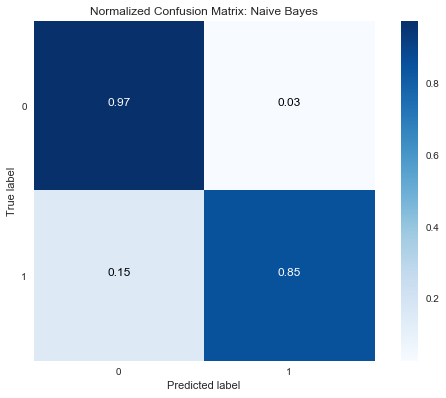

In [47]:
#creating confusion matrix
CM =pd.crosstab(Y_test,NB_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test,NB_pred)))
print(pd.DataFrame(confusion_matrix(Y_test,NB_pred)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(Y_test,NB_pred),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Naive Bayes')

In [48]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [49]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))

Recall score: 97.46344200399771 %
Specificity: 85.04938852304798 %
False +ve: 14.950611476952021 %
False -ve: 2.536557996002291 %


In [50]:
print("Precision score : {} %".format(precision_score(Y_test,NB_pred)*100))
print("Recall score : {} %".format(recall_score(Y_test,NB_pred)*100))
print("AUC_score is {}%".format(roc_auc_score(Y_test,NB_pred)*100))
print("Accuracy is {}%".format(accuracy_score(Y_test,NB_pred)*100))

Precision score : 97.08709192439862 %
Recall score : 85.04938852304798 %
AUC_score is 91.25641526352285%
Accuracy is 91.2749356640815%


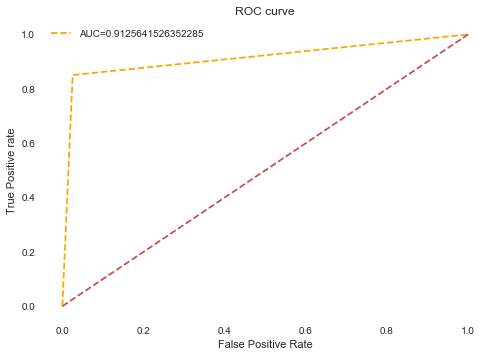

In [51]:
#AUC ROC Curve
fpr, tpr, _ = metrics.roc_curve(Y_test, NB_pred)

auc =  metrics.roc_auc_score(Y_test, NB_pred)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_NB',dpi=300)
plt.show()

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#fitting the model
RF_model = RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)

In [54]:
#predicting
RF_pred = RF_model.predict(X_test)

In [55]:
confusion_matrix(Y_test,RF_pred)

array([[85528,    21],
       [    0, 85040]], dtype=int64)

##### Random Forest Metrics

Accuracy Score is 0.99988
       0      1
0  85528     21
1      0  85040
[[9.99754527e-01 2.45473354e-04]
 [0.00000000e+00 1.00000000e+00]]


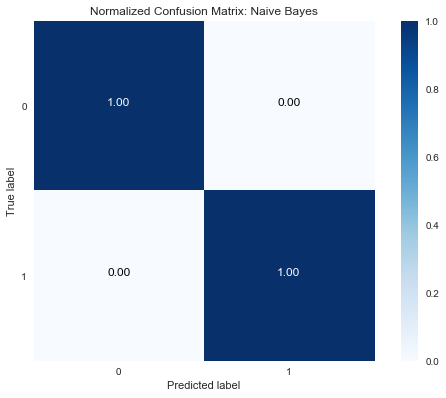

In [56]:
#creating confusion matrix
CM =pd.crosstab(Y_test,RF_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test,RF_pred)))
print(pd.DataFrame(confusion_matrix(Y_test,RF_pred)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(Y_test,RF_pred),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Naive Bayes')

In [57]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [58]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))
precision = ((TP)/(TP+FP))*100
print('Precision : {}%'.format(precision))

Recall score: 99.97545266455482 %
Specificity: 100.0 %
False +ve: 0.0 %
False -ve: 0.02454733544518346 %
Precision : 100.0%


In [59]:
print("Accuracy is {}%".format(((TP+TN)/(TN+FN+TP+FP))*100))

Accuracy is 99.98768971035648%


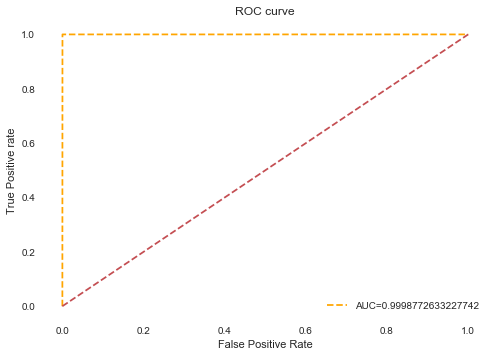

In [60]:
#AUC ROC Curve
fpr, tpr, _ = metrics.roc_curve(Y_test,  RF_pred)

auc =  metrics.roc_auc_score(Y_test, RF_pred)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_RF',dpi=300)
plt.show()